<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>  
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową.  Więcej informacji w ksiązce v1_web.pdf dołączonej do tego zadania.

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



In [ ]:
mod physics;
mod visualization;

use physics::{three_body, euler, rk4};
use visualization::{draw_trajectories, draw_method_comparison_grid, plot_energy_errors_grid};
use chrono::Local;

fn main() -> Result<(), Box<dyn std::error::Error>> {
    // Początkowe warunki: 3 ciała
    let y0 = vec![
        -1.0, 0.0, // x1, y1
        1.0, 0.0,  // x2, y2
        0.0, 0.5,  // x3, y3
        0.0, 1.0,  // vx1, vy1
        0.0, -1.0, // vx2, vy2
        0.0, 0.0,  // vx3, vy3
    ];

    // Define 4 different time steps - from coarse to fine
    let dt_values = [0.001, 0.0001, 0.00001, 0.000001];
    let steps_values = [10000, 100000, 1000000, 10000000]; // Adjust steps to keep total simulation time similar
    
    let mut euler_results = Vec::new();
    let mut rk4_results = Vec::new();
    
    // Run simulations for each dt
    for (i, &dt) in dt_values.iter().enumerate() {
        println!("Running simulations with dt = {}", dt);
        let steps = steps_values[i];
        
        let euler_result = euler(three_body, y0.clone(), 0.0, dt, steps);
        let rk4_result = rk4(three_body, y0.clone(), 0.0, dt, steps);
        
        euler_results.push(euler_result);
        rk4_results.push(rk4_result);
    }
    
    // Create the comparison grids
    let now = Local::now();
    let timestamp = now.format("%Y%m%d_%H%M%S").to_string();

    let euler_filename = format!("euler_grid_comparison_{}.png", timestamp);
    let rk4_filename = format!("rk4_grid_comparison_{}.png", timestamp);
    let energy_filename = format!("energy_error_grid_{}.png", timestamp);

    draw_method_comparison_grid("Metoda Eulera", &euler_results, &dt_values, &euler_filename)?;
    draw_method_comparison_grid("Metoda RK4", &rk4_results, &dt_values, &rk4_filename)?;
    
    // Create energy comparison grid
    plot_energy_errors_grid(&euler_results, &rk4_results, &dt_values, &energy_filename)?;

    println!("Symulacja zakończona. Wygenerowano:");
    println!("- {}", euler_filename);
    println!("- {}", rk4_filename);
    println!("- {}", energy_filename);
    
    println!("Symulacja zakończona. Wygenerowano:");
    println!("- euler_grid_comparison.png");
    println!("- rk4_grid_comparison.png");
    println!("- energy_error_grid.png");
    
    Ok(())
}

In [ ]:
pub const G: f64 = 1.0; // Stała grawitacji

// Funkcja opisująca dynamikę układu 3 ciał w 2D
pub fn three_body(y: &Vec<f64>, _t: f64) -> Vec<f64> {
    let m1 = 1.0;
    let m2 = 1.0;
    let m3 = 1.0;

    // pozycje
    let (x1, y1, x2, y2, x3, y3) = (y[0], y[1], y[2], y[3], y[4], y[5]);
    // prędkości
    let (vx1, vy1, vx2, vy2, vx3, vy3) = (y[6], y[7], y[8], y[9], y[10], y[11]);

    let dx12 = x2 - x1;
    let dy12 = y2 - y1;
    let dx13 = x3 - x1;
    let dy13 = y3 - y1;
    let dx23 = x3 - x2;
    let dy23 = y3 - y2;

    let r12 = (dx12.powi(2) + dy12.powi(2)).sqrt().powi(3);
    let r13 = (dx13.powi(2) + dy13.powi(2)).sqrt().powi(3);
    let r23 = (dx23.powi(2) + dy23.powi(2)).sqrt().powi(3);

    let ax1 = G * (m2 * dx12 / r12 + m3 * dx13 / r13);
    let ay1 = G * (m2 * dy12 / r12 + m3 * dy13 / r13);

    let ax2 = G * (-m1 * dx12 / r12 + m3 * dx23 / r23);
    let ay2 = G * (-m1 * dy12 / r12 + m3 * dy23 / r23);

    let ax3 = G * (-m1 * dx13 / r13 - m2 * dx23 / r23);
    let ay3 = G * (-m1 * dy13 / r13 - m2 * dy23 / r23);

    vec![
        vx1, vy1, vx2, vy2, vx3, vy3, // pochodne pozycji = prędkości
        ax1, ay1, ax2, ay2, ax3, ay3, // pochodne prędkości = przyspieszenia
    ]
}

// Metoda Eulera
pub fn euler<F>(f: F, y0: Vec<f64>, t0: f64, dt: f64, steps: usize) -> Vec<Vec<f64>>
where
    F: Fn(&Vec<f64>, f64) -> Vec<f64>,
{
    let mut y = y0.clone();
    let mut result = vec![y.clone()];
    let mut t = t0;

    for _ in 0..steps {
        let dy = f(&y, t);
        for i in 0..y.len() {
            y[i] += dt * dy[i];
        }
        result.push(y.clone());
        t += dt;
    }

    result
}

// Runge-Kutta 4th order method
pub fn rk4<F>(f: F, y0: Vec<f64>, t0: f64, dt: f64, steps: usize) -> Vec<Vec<f64>>
where
    F: Fn(&Vec<f64>, f64) -> Vec<f64>,
{
    let mut y = y0.clone();
    let mut result = vec![y.clone()];
    let mut t = t0;

    for _ in 0..steps {
        let k1 = f(&y, t);
        
        let mut y_temp = y.clone();
        for i in 0..y.len() {
            y_temp[i] += dt * k1[i] / 2.0;
        }
        let k2 = f(&y_temp, t + dt / 2.0);
        
        let mut y_temp = y.clone();
        for i in 0..y.len() {
            y_temp[i] += dt * k2[i] / 2.0;
        }
        let k3 = f(&y_temp, t + dt / 2.0);
        
        let mut y_temp = y.clone();
        for i in 0..y.len() {
            y_temp[i] += dt * k3[i];
        }
        let k4 = f(&y_temp, t + dt);
        
        for i in 0..y.len() {
            y[i] += dt * (k1[i] + 2.0 * k2[i] + 2.0 * k3[i] + k4[i]) / 6.0;
        }
        
        result.push(y.clone());
        t += dt;
    }

    result
}

// Add this function to calculate total energy
pub fn calculate_energy(state: &Vec<f64>) -> f64 {
    let m1 = 1.0;
    let m2 = 1.0;
    let m3 = 1.0;

    // Positions
    let (x1, y1, x2, y2, x3, y3) = (state[0], state[1], state[2], state[3], state[4], state[5]);
    // Velocities
    let (vx1, vy1, vx2, vy2, vx3, vy3) = (state[6], state[7], state[8], state[9], state[10], state[11]);

    // Kinetic energy
    let kinetic = 0.5 * m1 * (vx1*vx1 + vy1*vy1) + 
                  0.5 * m2 * (vx2*vx2 + vy2*vy2) + 
                  0.5 * m3 * (vx3*vx3 + vy3*vy3);

    // Distances between bodies
    let r12 = ((x2-x1).powi(2) + (y2-y1).powi(2)).sqrt();
    let r13 = ((x3-x1).powi(2) + (y3-y1).powi(2)).sqrt();
    let r23 = ((x3-x2).powi(2) + (y3-y2).powi(2)).sqrt();

    // Potential energy
    let potential = -G * ((m1*m2/r12) + (m1*m3/r13) + (m2*m3/r23));

    kinetic + potential
}

In [ ]:
use plotters::prelude::*;
use crate::physics::calculate_energy;

// Wykres torów
pub fn draw_trajectories(data: &Vec<Vec<f64>>, filename: &str) -> Result<(), Box<dyn std::error::Error>> {
    let root = BitMapBackend::new(filename, (800, 600)).into_drawing_area();
    root.fill(&WHITE)?;

    let (x_vals, y_vals): (Vec<_>, Vec<_>) = data
        .iter()
        .flat_map(|s| vec![s[0], s[2], s[4]])
        .zip(data.iter().flat_map(|s| vec![s[1], s[3], s[5]]))
        .unzip();

    let x_range = x_vals.iter().cloned().fold(f64::INFINITY, f64::min)
        ..x_vals.iter().cloned().fold(f64::NEG_INFINITY, f64::max);
    let y_range = y_vals.iter().cloned().fold(f64::INFINITY, f64::min)
        ..y_vals.iter().cloned().fold(f64::NEG_INFINITY, f64::max);

    let mut chart = ChartBuilder::on(&root)
        .caption("Trajektorie 3 ciał (Euler)", ("sans-serif", 30))
        .margin(20)
        .x_label_area_size(40)
        .y_label_area_size(40)
        .build_cartesian_2d(x_range, y_range)?;

    chart.configure_mesh().draw()?;

    let mut x1 = vec![];
    let mut y1 = vec![];
    let mut x2 = vec![];
    let mut y2 = vec![];
    let mut x3 = vec![];
    let mut y3 = vec![];

    for s in data {
        x1.push(s[0]);
        y1.push(s[1]);
        x2.push(s[2]);
        y2.push(s[3]);
        x3.push(s[4]);
        y3.push(s[5]);
    }

    chart.draw_series(LineSeries::new(x1.iter().zip(y1.iter()).map(|(&x, &y)| (x, y)), &RED))?;
    chart.draw_series(LineSeries::new(x2.iter().zip(y2.iter()).map(|(&x, &y)| (x, y)), &BLUE))?;
    chart.draw_series(LineSeries::new(x3.iter().zip(y3.iter()).map(|(&x, &y)| (x, y)), &GREEN))?;

    Ok(())
}

pub fn draw_method_comparison_grid(method_name: &str, results: &[Vec<Vec<f64>>], dt_values: &[f64], filename: &str) -> Result<(), Box<dyn std::error::Error>> {
    let root = BitMapBackend::new(filename, (1000, 1000)).into_drawing_area();
    root.fill(&WHITE)?;
    
    // Split the drawing area into a 2x2 grid
    let areas = root.split_evenly((2, 2));
    
    for (idx, (area, result)) in areas.iter().zip(results.iter()).enumerate() {
        // Extract positions
        let (x_vals, y_vals): (Vec<_>, Vec<_>) = result
            .iter()
            .flat_map(|s| vec![s[0], s[2], s[4]])
            .zip(result.iter().flat_map(|s| vec![s[1], s[3], s[5]]))
            .unzip();

        // Calculate ranges
        let x_range = x_vals.iter().cloned().fold(f64::INFINITY, f64::min)
            ..x_vals.iter().cloned().fold(f64::NEG_INFINITY, f64::max);
        let y_range = y_vals.iter().cloned().fold(f64::INFINITY, f64::min)
            ..y_vals.iter().cloned().fold(f64::NEG_INFINITY, f64::max);

        // Create chart for this section
        let mut chart = ChartBuilder::on(area)
            .caption(format!("{} (dt = {})", method_name, dt_values[idx]), ("sans-serif", 20))
            .margin(10)
            .x_label_area_size(30)
            .y_label_area_size(30)
            .build_cartesian_2d(x_range, y_range)?;

        chart.configure_mesh().draw()?;

        // Extract trajectory data
        let mut x1 = vec![];
        let mut y1 = vec![];
        let mut x2 = vec![];
        let mut y2 = vec![];
        let mut x3 = vec![];
        let mut y3 = vec![];

        for s in result {
            x1.push(s[0]);
            y1.push(s[1]);
            x2.push(s[2]);
            y2.push(s[3]);
            x3.push(s[4]);
            y3.push(s[5]);
        }

        // Draw trajectories
        chart.draw_series(LineSeries::new(x1.iter().zip(y1.iter()).map(|(&x, &y)| (x, y)), &RED))?;
        chart.draw_series(LineSeries::new(x2.iter().zip(y2.iter()).map(|(&x, &y)| (x, y)), &BLUE))?;
        chart.draw_series(LineSeries::new(x3.iter().zip(y3.iter()).map(|(&x, &y)| (x, y)), &GREEN))?;
    }

    Ok(())
}

pub fn plot_energy_errors_grid(euler_results: &[Vec<Vec<f64>>], rk4_results: &[Vec<Vec<f64>>], dt_values: &[f64], filename: &str) -> Result<(), Box<dyn std::error::Error>> {
    let root = BitMapBackend::new(filename, (1000, 1000)).into_drawing_area();
    root.fill(&WHITE)?;
    
    // Split the drawing area into a 2x2 grid
    let areas = root.split_evenly((2, 2));
    
    for (idx, (area, (euler_data, rk4_data))) in areas.iter().zip(euler_results.iter().zip(rk4_results.iter())).enumerate() {
        // Calculate energy error for both methods
        let euler_energy: Vec<f64> = euler_data.iter().map(|state| calculate_energy(state)).collect();
        let rk4_energy: Vec<f64> = rk4_data.iter().map(|state| calculate_energy(state)).collect();
        
        // Calculate relative energy error
        let initial_energy_euler = euler_energy[0];
        let initial_energy_rk4 = rk4_energy[0];
        
        let euler_energy_error: Vec<f64> = euler_energy.iter()
            .map(|e| (e - initial_energy_euler).abs() / initial_energy_euler.abs())
            .collect();
        
        let rk4_energy_error: Vec<f64> = rk4_energy.iter()
            .map(|e| (e - initial_energy_rk4).abs() / initial_energy_rk4.abs())
            .collect();
        
        let time_points: Vec<f64> = (0..euler_energy.len()).map(|i| i as f64).collect();
        
        // Find the min/max error for Y axis scaling
        let min_error = euler_energy_error.iter()
            .chain(rk4_energy_error.iter())
            .cloned()
            .fold(f64::MAX, |a, b| a.min(b))
            .max(1e-15);
        
        let max_error = euler_energy_error.iter()
            .chain(rk4_energy_error.iter())
            .cloned()
            .fold(0.0, f64::max)
            .max(1e-12);
        
        // Create chart for this section
        let mut chart = ChartBuilder::on(area)
            .caption(format!("Błąd energii (dt = {})", dt_values[idx]), ("sans-serif", 20))
            .margin(10)
            .x_label_area_size(30)
            .y_label_area_size(40)
            .build_cartesian_2d(
                0.0..time_points.len() as f64,
                (min_error / 10.0..max_error * 10.0).log_scale()
            )?;
    
        chart.configure_mesh()
            .y_desc("Błąd (log)")
            .x_desc("Krok")
            .draw()?;
        
        // Draw energy error plots
        chart.draw_series(LineSeries::new(
            time_points.iter().zip(euler_energy_error.iter()).map(|(&t, &e)| (t, e)),
            &RED,
        ))?
        .label("Euler")
        .legend(|(x, y)| PathElement::new(vec![(x, y), (x + 20, y)], &RED));
        
        chart.draw_series(LineSeries::new(
            time_points.iter().zip(rk4_energy_error.iter()).map(|(&t, &e)| (t, e)),
            &BLUE,
        ))?
        .label("RK4")
        .legend(|(x, y)| PathElement::new(vec![(x, y), (x + 20, y)], &BLUE));
        
        // Add legend
        chart.configure_series_labels()
            .background_style(&WHITE.mix(0.8))
            .border_style(&BLACK)
            .draw()?;
    }

    Ok(())
}

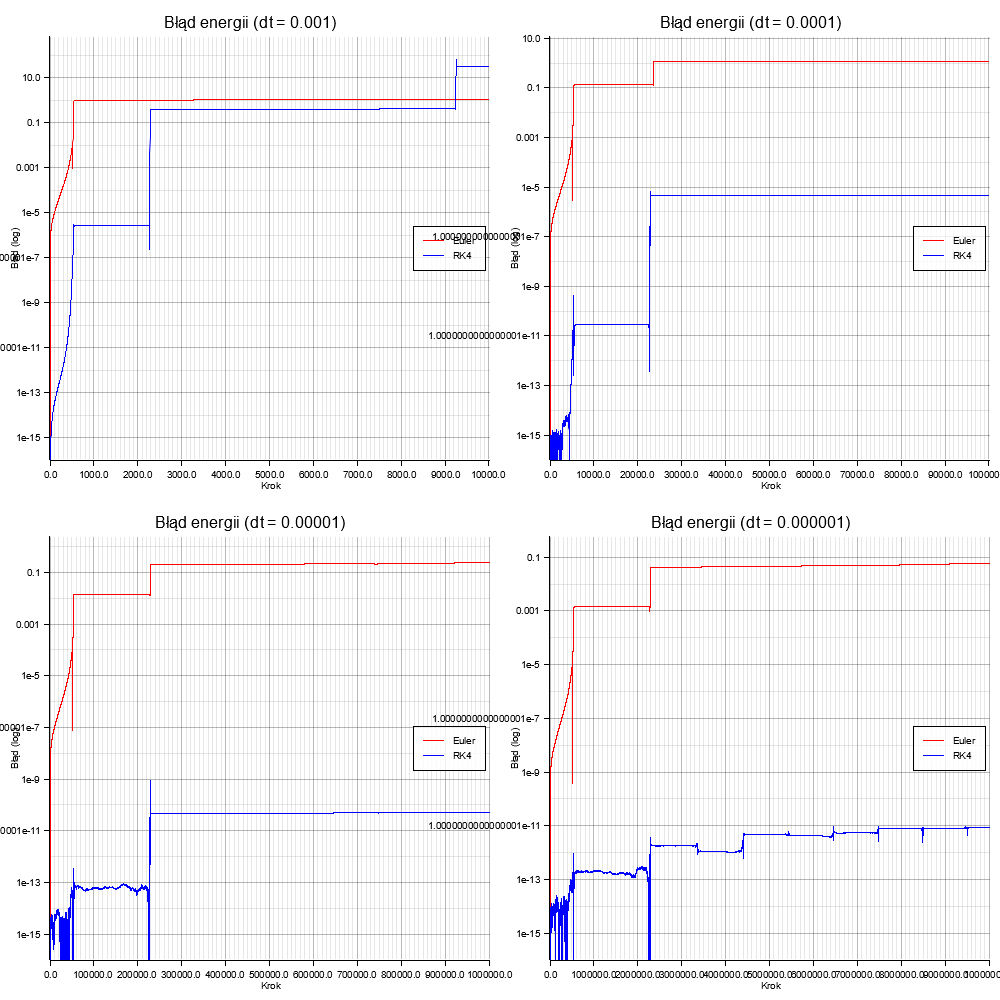
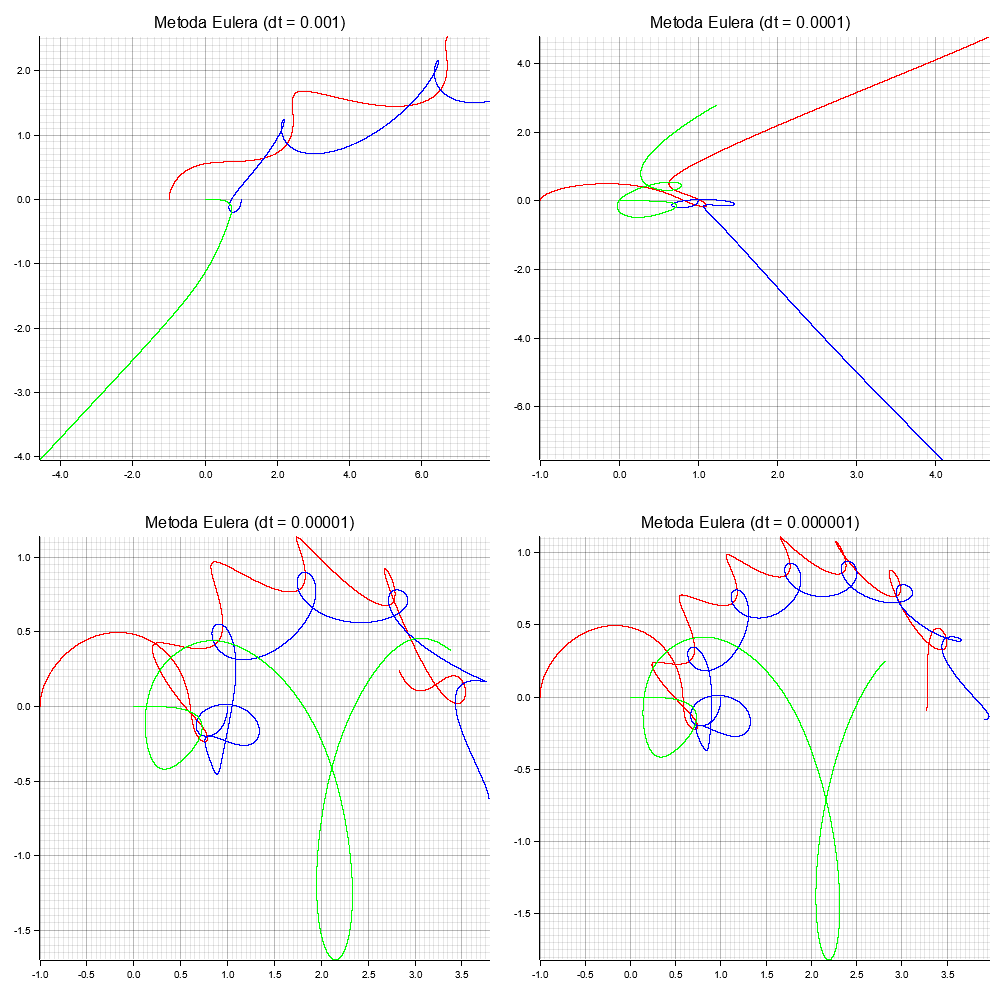
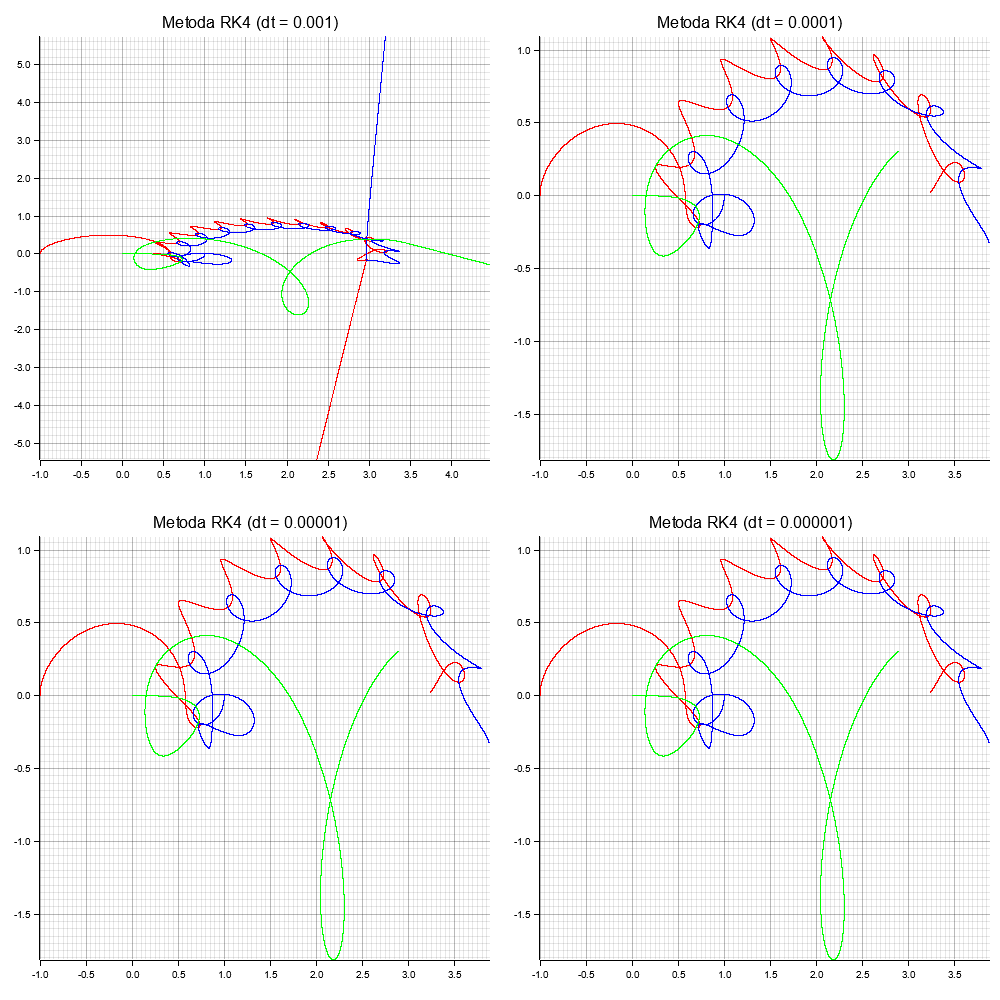

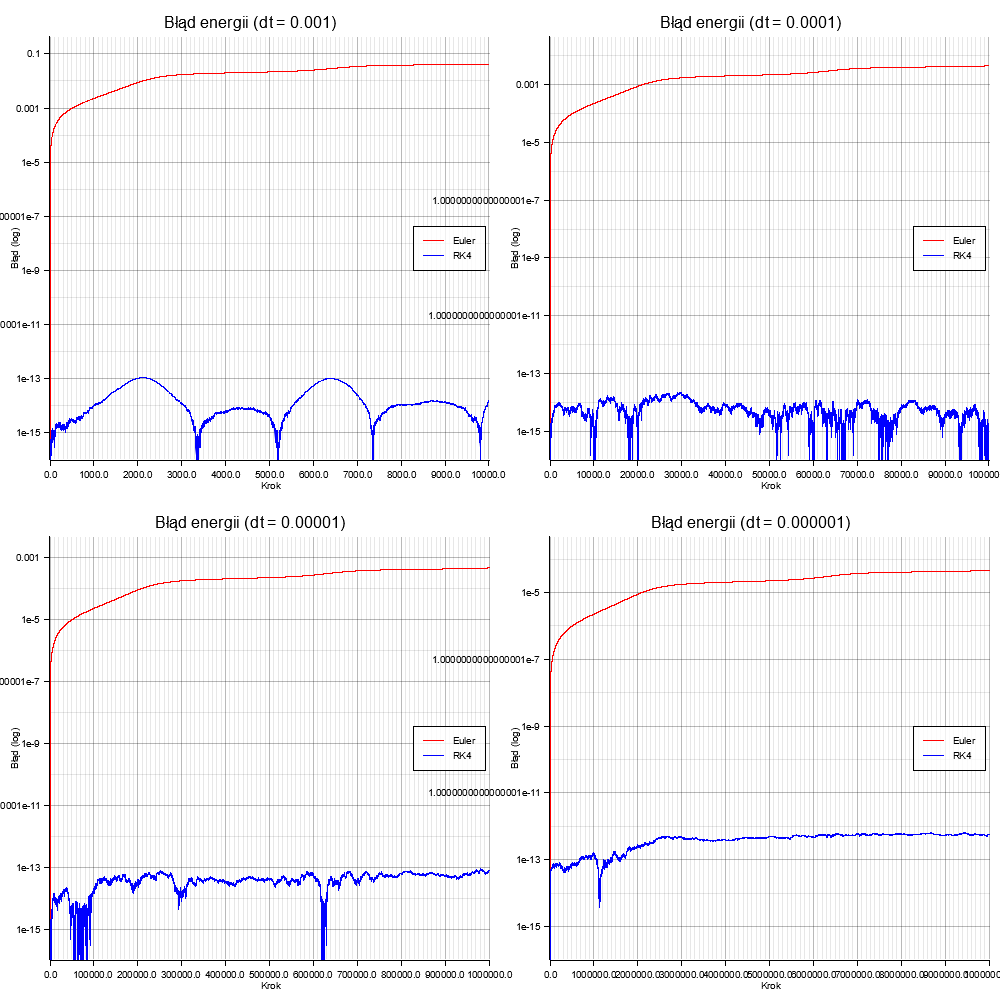
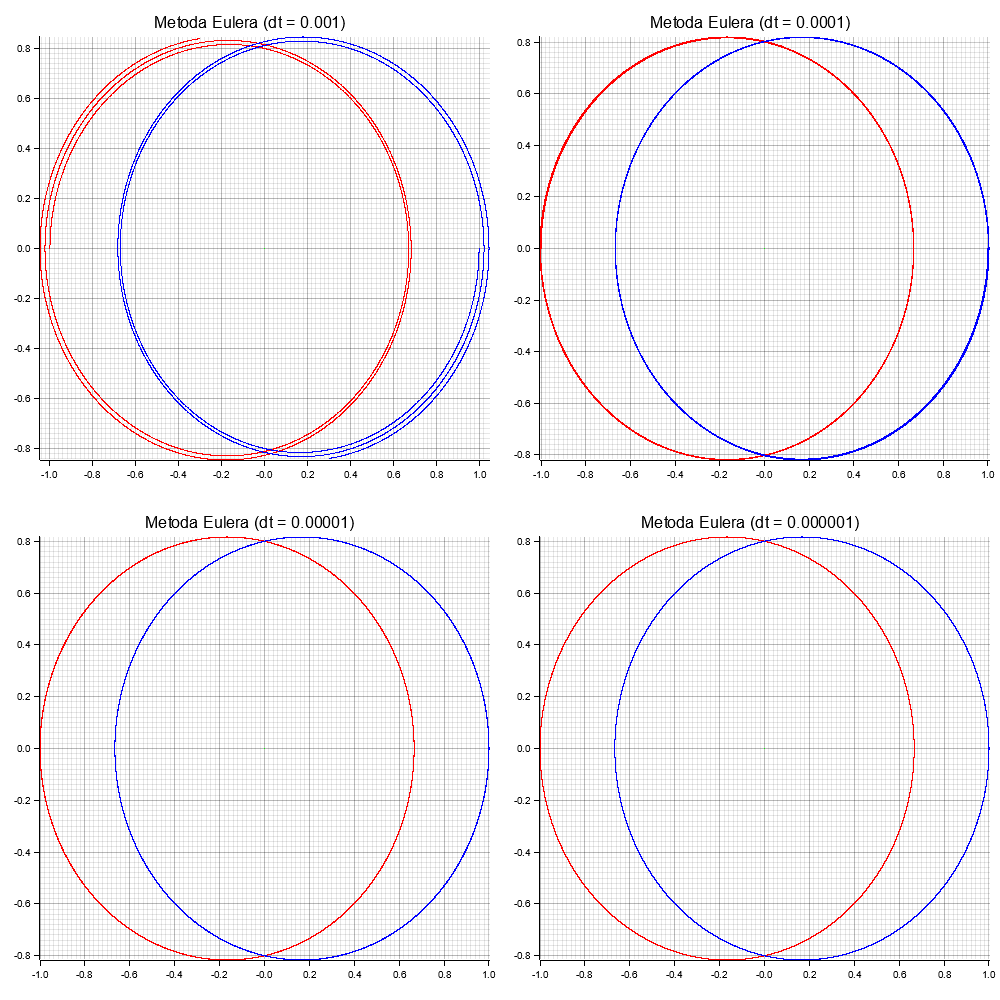
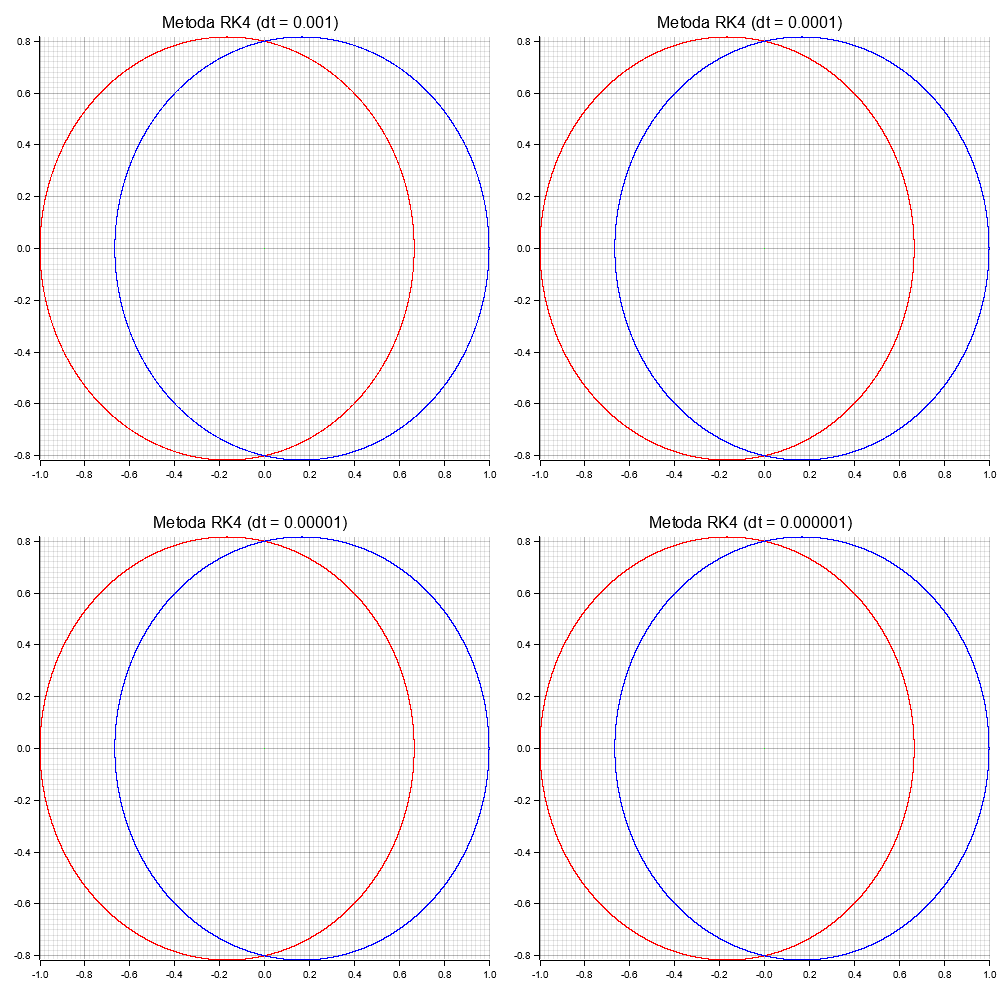

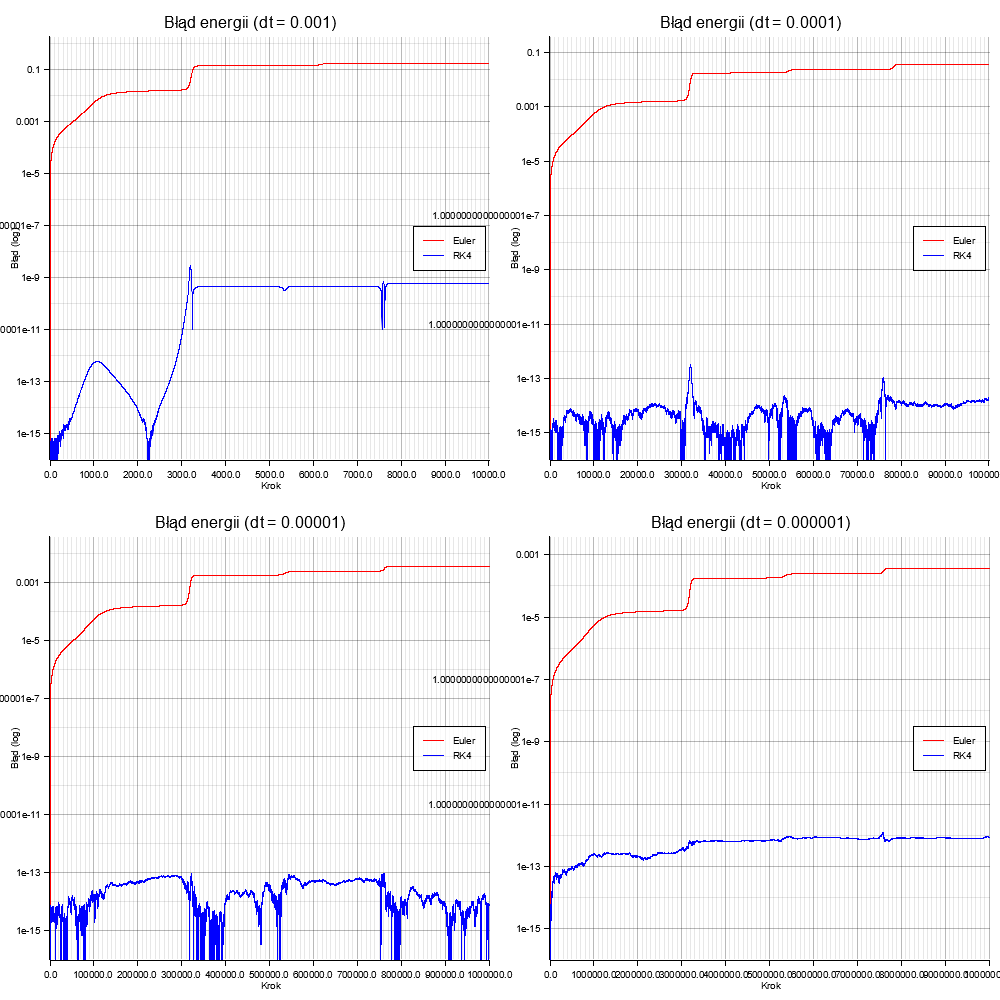
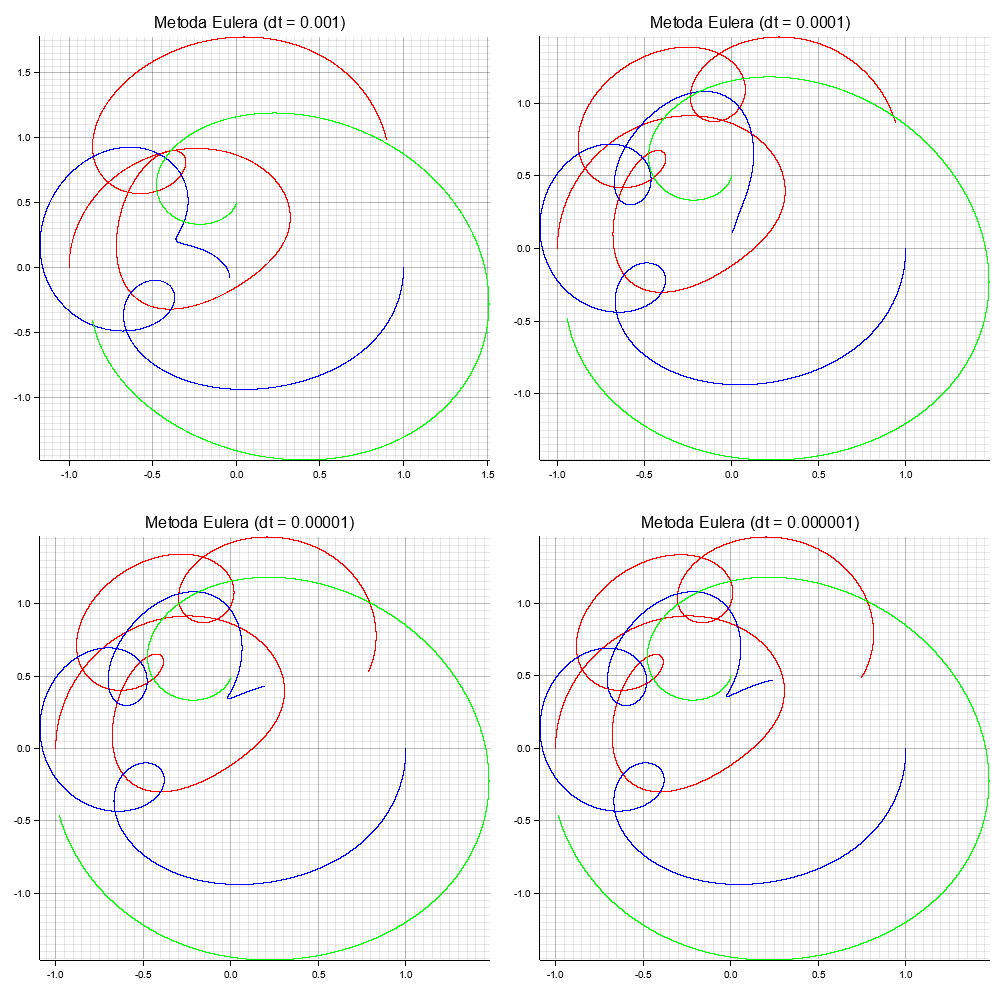
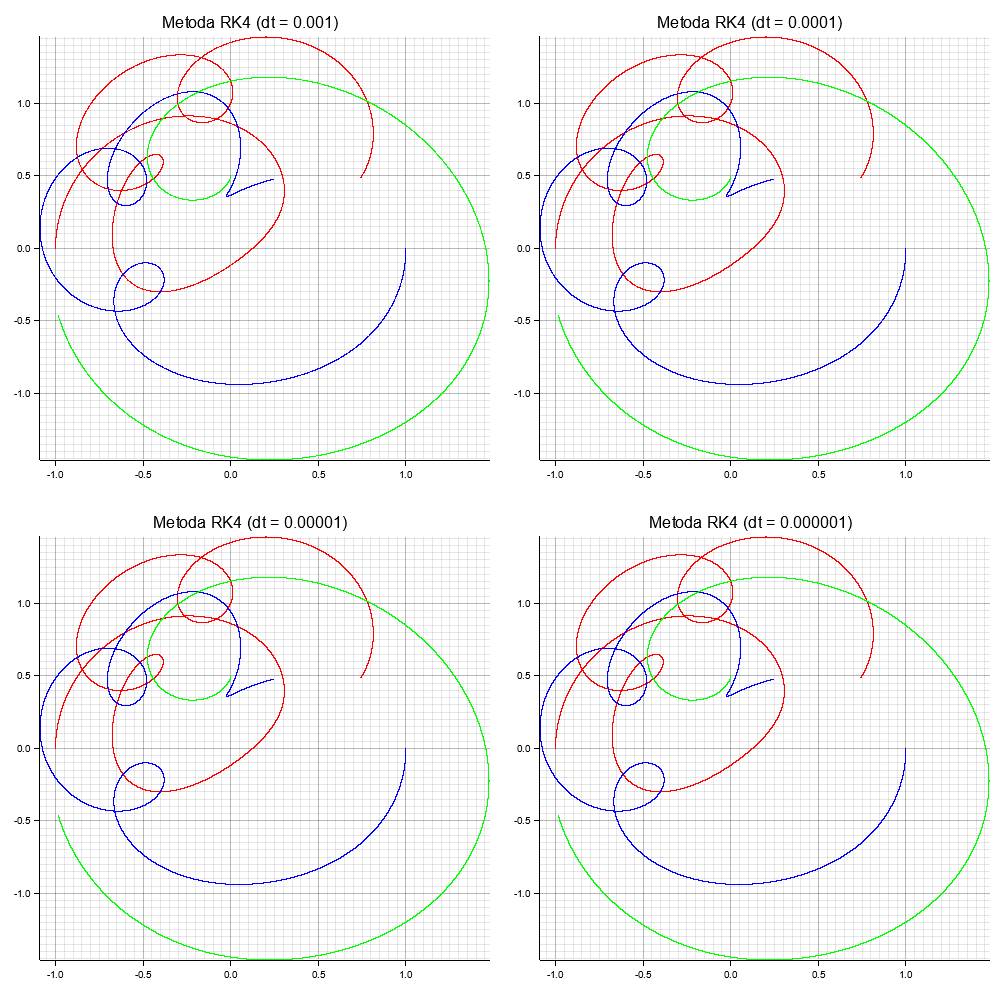